[*********************100%***********************]  1 of 1 completed
c:\Users\Peshi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


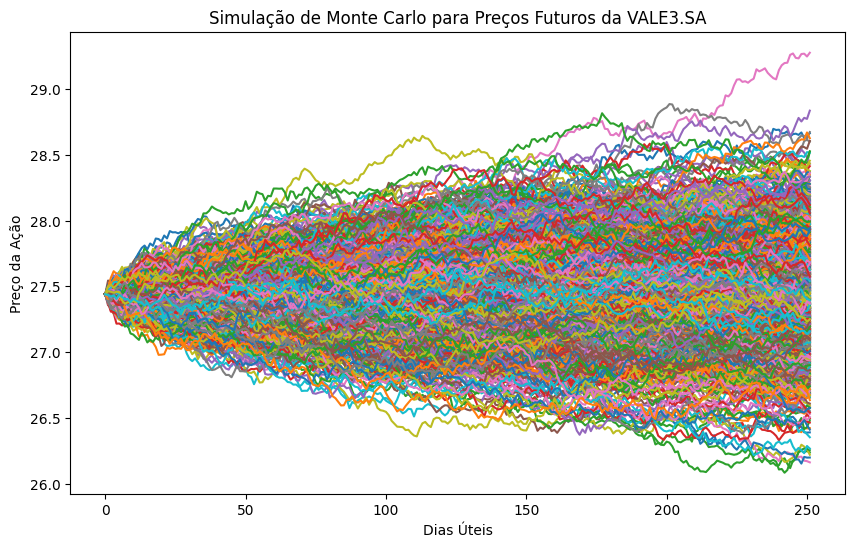

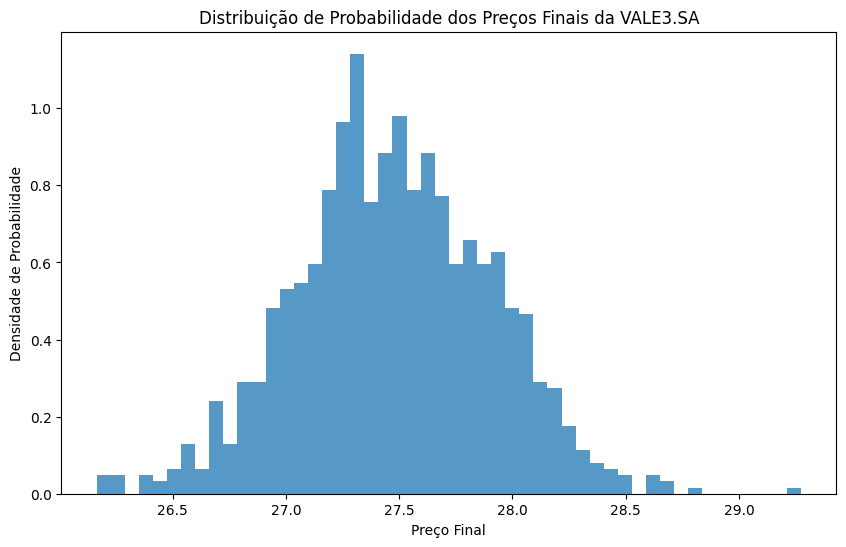

In [1]:
#BIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# 1. Coleta de Dados
data_inicial = '2022-01-01'
data_final = dt.datetime.now()
precos_historicos = yf.download('BBAS3.SA', start=data_inicial, end=data_final)["Close"]

# Calcula os retornos percentuais
retornos = precos_historicos.pct_change().dropna()  # Remove valores NaN

# 2. Parâmetros do Modelo
mu = np.mean(retornos)  # Retorno médio
std = np.std(retornos)  # Volatilidade (Desvio Padrão dos Retornos)
S0 = precos_historicos.iloc[-1]  # Preço atual (Último Preço Histórico)
T = 1  # Período de tempo (1 ano)
N = 252  # Número de dias úteis em um ano
dt = T / N  # Intervalo de tempo diário
num_simulacoes = 1000  # Número de simulações

# 3. Simulação de Monte Carlo
precos_futuros = np.zeros((N, num_simulacoes))
precos_futuros[0] = S0

for t in range(1, N):
    # Gera incrementos aleatórios com base no movimento browniano geométrico
    incrementos = np.random.normal((mu - 0.5 * std**2) * dt, std * np.sqrt(dt), num_simulacoes)
    precos_futuros[t] = precos_futuros[t-1] * np.exp(incrementos)

# 4. Visualização dos Resultados
plt.figure(figsize=(10, 6))
plt.plot(precos_futuros)
plt.title('Simulação de Monte Carlo para Preços Futuros da VALE3.SA')
plt.xlabel('Dias Úteis')
plt.ylabel('Preço da Ação')
plt.show()

# Distribuição de Probabilidade dos Preços Finais
precos_finais = precos_futuros[-1]
plt.figure(figsize=(10, 6))
plt.hist(precos_finais, bins=50, density=True, alpha=0.75)
plt.title('Distribuição de Probabilidade dos Preços Finais da VALE3.SA')
plt.xlabel('Preço Final')
plt.ylabel('Densidade de Probabilidade')
plt.show()